In [0]:
from sklearn.impute import SimpleImputer
from IPython.display import Image


from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import export_graphviz, DecisionTreeClassifier
import graphviz
import pydotplus
import numpy
import pandas as panda
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
##########
# TASK 1 #
##########
column_names = ['age', 'workclass', 'education', 'marital-status', 
            'occupation', 'relationship', 'race', 'sex', 'capital-gain', 
            'capital-loss', 'hours-per-week', 'native-country', '50k']

trainDataFrame = panda.read_csv("adult_train.txt", names = column_names).copy()
testDataFrame = panda.read_csv("adult_test.txt", header = None, na_values= " ?").copy()

testDataFrame.columns = column_names

trainWorkclassMode = trainDataFrame["workclass"].mode()
trainOccupationMode = trainDataFrame["occupation"].mode()
trainNativeCountryMode = trainDataFrame["native-country"].mode()

# replacing NA values with the mode of that column
trainDataFrame["workclass"].fillna(trainWorkclassMode, inplace = True)
trainDataFrame["occupation"].fillna(trainOccupationMode, inplace = True)
trainDataFrame["native-country"].fillna(trainNativeCountryMode, inplace = True)

# saving to CSV
trainDataFrame.to_csv("goodTrainDataFrame.csv")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
##########
# TASK 2 #
##########
columnLength = len(trainDataFrame.columns)
non_dummy_cols = ["50k"]

# setting up which columns we want for the get_dummies
dummy_cols = list(set(trainDataFrame.columns) - set(non_dummy_cols))

# making the binary DF
binaryTrainDF = panda.get_dummies(trainDataFrame, columns = dummy_cols)

# saving to CSV
binaryTrainDF.to_csv("binaryTrainDF.csv")

# setting up x and y values for the split
x = binaryTrainDF.drop(columns="50k").values
y = binaryTrainDF["50k"]

# splitting data
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, test_size = 0.30, random_state = 85)

In [0]:
binaryTrainDF

,50k,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,capital-loss_0,capital-loss_155,capital-loss_213,capital-loss_323,capital-loss_419,capital-loss_625,capital-loss_653,capital-loss_810,capital-loss_880,capital-loss_974,capital-loss_1092,capital-loss_1138,capital-loss_1258,capital-loss_1340,capital-loss_1380,capital-loss_1408,capital-loss_1411,capital-loss_1485,capital-loss_1504,capital-loss_1539,capital-loss_1564,capital-loss_1573,capital-loss_1579,capital-loss_1590,capital-loss_1594,capital-loss_1602,capital-loss_1617,capital-loss_1628,...,capital-gain_5178,capital-gain_5455,capital-gain_5556,capital-gain_5721,capital-gain_6097,capital-gain_6360,capital-gain_6418,capital-gain_6497,capital-gain_6514,capital-gain_6723,capital-gain_6767,capital-gain_6849,capital-gain_7298,capital-gain_7430,capital-gain_7443,capital-gain_7688,capital-gain_7896,capital-gain_7978,capital-gain_8614,capital-gain_9386,capital-gain_9562,capital-gain_10520,capital-gain_10566,capital-gain_10605,capital-gain_11678,capital-gain_13550,capital-gain_14084,capital-gain_14344,capital-gain_15020,capital-gain_15024,capital-gain_15831,capital-gain_18481,capital-gain_20051,capital-gain_22040,capital-gain_25124,capital-gain_25236,capital-gain_27828,capital-gain_34095,capital-gain_41310,capital-gain_99999
0,<=50K,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,<=50K,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,<=50K,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,<=50K,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,<=50K,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,<=50K,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32557,>50K,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32558,<=50K,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32559,<=50K,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
##########
# TASK 3 #
##########
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# will be using these for looping purposes
max_depth = range(1, 31)
min_leaf = range(1, 51)

# will store the accuracy of specified data
maxDepthAccuracyTrain = []
maxDepthAccuracyTest = []

# will store the accuracy of specified data
minLeafAccuracyTrain = []
minLeafAccuracyTest = []

range(1, 51)


In [0]:
# getting all different values of the fitting process
# based on the different values of max_depth
# then storing in designated list
for i in max_depth:
    maxDepth = DecisionTreeClassifier(max_depth = i, random_state = 85)
    maxDepth.fit(X_train, y_train) 
    maxDepthAccuracyTrain.append(maxDepth.score(X_train, y_train))

In [0]:
# getting all different values of the fitting process
# based on the different values of max_depth
# then storing in designated list
for i in max_depth:
    maxDepth = DecisionTreeClassifier(max_depth = i, random_state = 85)
    maxDepth.fit(X_test, y_test) 
    maxDepthAccuracyTest.append(maxDepth.score(X_test, y_test))

In [0]:
# getting all different values of the fitting process
# based on the different values of min_samples_leaf 
# then storing in designated list
for i in min_leaf:
    minLeaf = DecisionTreeClassifier(min_samples_leaf = i, random_state = 85)
    minLeaf.fit(X_train, y_train) 
    minLeafAccuracyTrain.append(minLeaf.score(X_train, y_train))

In [0]:
# getting all different values of the fitting process
# based on the different values of min_samples_leaf 
# then storing in designated list
for i in min_leaf:
    minLeaf = DecisionTreeClassifier(min_samples_leaf= i, random_state = 85)
    minLeaf.fit(X_test, y_test) 
    minLeafAccuracyTest.append(minLeaf.score(X_test, y_test))

In [0]:
# since the last index (represents max depth of 30)
# is the highest, we get index == 29, then + 1 to = 30
bestMaxDepthAccTrain = numpy.argmax(maxDepthAccuracyTrain) + 1
bestMaxDepthAccTest = numpy.argmax(maxDepthAccuracyTest) + 1


# since the first index (represents min leaf of 1)
# is the highest, we get index == 0, then + 1 to = 1 
bestMinLeafTrain = numpy.argmax(minLeafAccuracyTrain) + 1
bestMinLeafTest = numpy.argmax(minLeafAccuracyTest) + 1

50


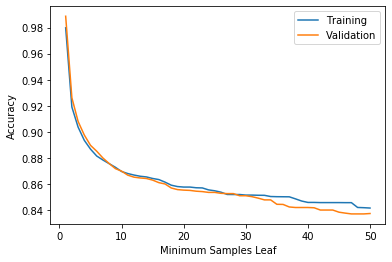

In [0]:
# plotting both train and test values on graph
plt.plot(min_leaf, minLeafAccuracyTrain, label='Training')
plt.plot(min_leaf, minLeafAccuracyTest, label='Validation')

plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('Minimum Samples Leaf')
plt.show()

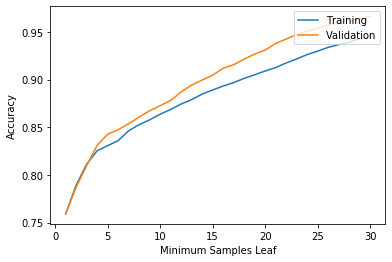

In [0]:
# plotting both train and test values on graph
plt.plot(max_depth, maxDepthAccuracyTrain, label='Training')
plt.plot(max_depth, maxDepthAccuracyTest, label='Validation')

plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('Minimum Samples Leaf')
plt.show()

In [0]:
# creating DTC object with best configurations
# that we found previously
dTree = DecisionTreeClassifier(
    max_depth= bestMaxDepthAccTrain,
    min_samples_leaf= bestMinLeafTrain,
    random_state=85)

dTree.fit(X_train, y_train)

dot_data = StringIO()

export_graphviz(dTree, out_file=dot_data, filled=True, rounded=True, special_characters=True)

# saving to .png
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('dTree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.519493 to fit



True

In [0]:
##########
# TASK 4 #
##########
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)

max_depth = range(1, 31)
min_leaf = range(1, 51)
n = range(1,51)

maxDepthAccuracyTrain = []
maxDepthAccuracyTest = []

minLeafAccuracyTrain = []
minLeafAccuracyTest = []

neAccuracyTrain = []
neAccuracyTest = []

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
for i in max_depth:
    maxDepth = RandomForestClassifier(max_depth = i, random_state = 85)
    maxDepth.fit(X_train, y_train) 
    maxDepthAccuracyTrain.append(maxDepth.score(X_train, y_train))

In [0]:
for i in max_depth:
    maxDepth = RandomForestClassifier(max_depth = i, random_state = 85)
    maxDepth.fit(X_train, y_train) 
    maxDepthAccuracyTest.append(maxDepth.score(X_test, y_test))

In [0]:
for i in min_leaf:
    minLeaf = RandomForestClassifier(min_samples_leaf = i, random_state = 85)
    minLeaf.fit(X_train, y_train) 
    minLeafAccuracyTrain.append(minLeaf.score(X_train, y_train))

In [0]:
for i in min_leaf:
    minLeaf = RandomForestClassifier(min_samples_leaf= i, random_state = 85)
    minLeaf.fit(X_train, y_train) 
    minLeafAccuracyTest.append(minLeaf.score(X_test, y_test))

In [0]:
for i in n:
  ne = RandomForestClassifier(n_estimators=i, random_state=85)
  ne.fit(X_train, y_train)
  neAccuracyTrain.append(ne.score(X_train, y_train))

In [0]:
for i in n:
  ne = RandomForestClassifier(n_estimators=i)
  ne.fit(X_train, y_train)
  neAccuracyTest.append(ne.score(X_test, y_test))

In [0]:
# since the last index (represents max depth of 30)
# is the highest, we get index == 29, then + 1 to = 30
bestMaxDepthAccTrain = numpy.argmax(maxDepthAccuracyTrain) + 1
bestMaxDepthAccTest = numpy.argmax(maxDepthAccuracyTest) + 1


# since the first index (represents min leaf of 1)
# is the highest, we get index == 0, then + 1 to = 1 
bestMinLeafTrain = numpy.argmax(minLeafAccuracyTrain) + 1
bestMinLeafTest = numpy.argmax(minLeafAccuracyTest) + 1

bestNTrain = numpy.argmax(neAccuracyTrain) + 1
bestNTest = numpy.argmax(neAccuracyTest) + 1

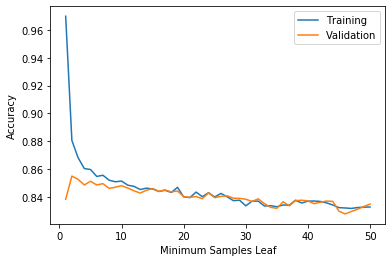

In [0]:
plt.plot(min_leaf, minLeafAccuracyTrain, label='Training')
plt.plot(min_leaf, minLeafAccuracyTest, label='Validation')

plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('Minimum Samples Leaf')
plt.show()

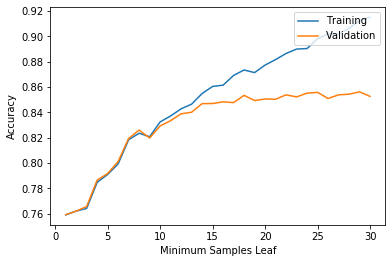

In [0]:
plt.plot(max_depth, maxDepthAccuracyTrain, label='Training')
plt.plot(max_depth, maxDepthAccuracyTest, label='Validation')

plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('Minimum Samples Leaf')
plt.show()

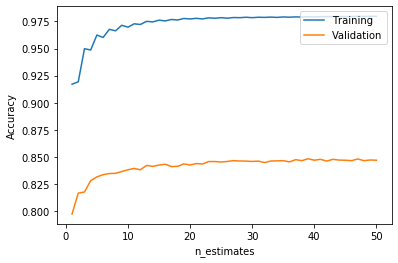

In [0]:
plt.plot(n, neAccuracyTrain, label='Training')
plt.plot(n, neAccuracyTest, label='Validation')

plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('n_estimates')
plt.show()

In [0]:
# creating RFC with only the n_estimators parameter
# all other parameters should be set to default
rfc1 = RandomForestClassifier(
    n_estimators = bestNTrain)

rfc1.fit(X_train, y_train)

# from what I found online, 
# this was the only way to produce
# a .png with the RFC
rfc1Est = rfc1.estimators_[0]
dot_data = StringIO()

export_graphviz(rfc1Est, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('rfc1.png')


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.413177 to fit



True

In [0]:
# creating RFC with n_estimators, min leaf, and max depth 
# using the best configurations we received previously
# all other parameters should be set to default
rfc2 = RandomForestClassifier(
    n_estimators = bestNTrain,
    min_samples_leaf = bestMinLeafTrain,
    max_depth = bestMaxDepthAccTrain)

rfc2.fit(X_train, y_train)

rfc2Est = rfc2.estimators_[0]
dot_data = StringIO()

export_graphviz(rfc2Est, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('rfc2.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.511433 to fit



True

In [0]:
##########
# TASK 5 #
##########
from sklearn.metrics import accuracy_score

# not sure how to do this correctly, but 
# since we need the whole training data,
# I split train_size = 1, hoping 0% will 
# be in test_size
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 1, random_state = 85)

maxDepthAccuracyTrain = []
maxDepthAccuracyTest = []

minLeafAccuracyTrain = []
minLeafAccuracyTest = []

neAccuracyTrain = []
neAccuracyTest = []

In [0]:
for i in max_depth:
    maxDepth = RandomForestClassifier(max_depth = i, random_state = 85)
    maxDepth.fit(X_train, y_train) 
    maxDepthAccuracyTrain.append(maxDepth.score(X_train, y_train))

In [0]:

for i in max_depth:
    maxDepth = RandomForestClassifier(max_depth = i, random_state = 85)
    maxDepth.fit(X_train, y_train) 
    maxDepthAccuracyTest.append(maxDepth.score(X_test, y_test))

In [0]:

for i in min_leaf:
    minLeaf = RandomForestClassifier(min_samples_leaf = i, random_state = 85)
    minLeaf.fit(X_train, y_train) 
    minLeafAccuracyTrain.append(minLeaf.score(X_train, y_train))

In [0]:

for i in min_leaf:
    minLeaf = RandomForestClassifier(min_samples_leaf= i, random_state = 85)
    minLeaf.fit(X_train, y_train) 
    minLeafAccuracyTest.append(minLeaf.score(X_test, y_test))

In [0]:

for i in n:
  ne = RandomForestClassifier(n_estimators=i, random_state=85)
  ne.fit(X_train, y_train)
  neAccuracyTrain.append(ne.score(X_train, y_train))

In [0]:

for i in n:
  ne = RandomForestClassifier(n_estimators=i)
  ne.fit(X_train, y_train)
  neAccuracyTest.append(ne.score(X_test, y_test))

In [0]:
# building RFC object with best configurations
# then fitting with the test values
# then evaluating our score
forest = RandomForestClassifier(n_estimators = bestNTrain, min_samples_leaf= bestMinLeafTrain, max_depth=bestMaxDepthAccTrain)
forest.fit(X_test, y_test)

y_pred = forest.predict(X_test)
print("RandomForestClassifier accuracy score: " , accuracy_score(y_test, y_pred))

0.913022113022113


In [0]:
# building DTC object with best configurations
# then fitting with the test values
# then evaluating our score
tr = DecisionTreeClassifier(max_depth=bestMaxDepthAccTrain, min_samples_leaf=bestMinLeafTrain)
tr.fit(X_test, y_test)

y_pred = tr.predict(X_test)
print("DecisionTreeClassifier accuracy score: ", accuracy_score(y_test, y_pred))

0.9361179361179361
